# Lab 6 - Model comparison

In [1]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
F = len('Arkadiusz')
L = len('Kontek')
N = (L + F) * 100

# Excercise 1 - generate data

In [3]:
model_1 = CmdStanModel(stan_file='code_1.stan')
model_2 = CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [22]:
data_sim = {'N':N}
sim_1 = model_1.sample(data=data_sim, seed=28052020, iter_sampling=1, iter_warmup=0, chains=1)
sim_2 = model_2.sample(data=data_sim, seed=28052020, iter_sampling=1, iter_warmup=0, chains=1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [23]:
d_1 = sim_1.draws_pd()
d_1.head()

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1491],y[1492],y[1493],y[1494],y[1495],y[1496],y[1497],y[1498],y[1499],y[1500]
0,0.0,0.0,0.01,0.014992,-0.673934,0.833857,-0.296466,1.75419,-0.509558,-0.003239,...,1.60626,0.275185,1.20722,0.317184,0.231445,-1.08811,0.450217,-0.028646,1.72558,0.205512


In [24]:
d_2 = sim_2.draws_pd()
d_2.head()

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1491],y[1492],y[1493],y[1494],y[1495],y[1496],y[1497],y[1498],y[1499],y[1500]
0,0.0,0.0,0.014992,-0.763171,1.08725,-1.18414,-0.296466,1.75419,-0.509558,-0.003239,...,0.455432,3.81133,-1.67251,5.16234,0.871883,1.6163,-5.27301,-0.621309,1.37687,0.850647


# Excercise 2 - compare normal and student models for data from first file

In [25]:
model_3 = CmdStanModel(stan_file='code_3.stan')
model_4 = CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling


In [26]:
data_sim_3 = {'N':N, 'y': d_1.loc[:, 'y[1]': f'y[{N}]'].values.reshape((N,))}
data_sim_4 = {'N':N, 'y': d_2.loc[:, 'y[1]': f'y[{N}]'].values.reshape((N,))}

In [28]:
sim_3 = model_3.sample(data=data_sim_3, seed=28052020)
sim_4 = model_4.sample(data=data_sim_4, seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [29]:
d_3 = sim_3.draws_pd()
d_3.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,log_lik[1],...,y_hat[1491],y_hat[1492],y_hat[1493],y_hat[1494],y_hat[1495],y_hat[1496],y_hat[1497],y_hat[1498],y_hat[1499],y_hat[1500]
0,-2643.26,0.872849,0.984053,1.0,1.0,0.0,2643.27,1.38023,0.090274,-1.24268,...,-2.501590,-0.145244,0.478559,1.068030,-0.444003,-0.685142,0.581127,-2.553420,1.465520,-1.066990
1,-2644.88,0.495673,0.984053,2.0,3.0,0.0,2648.53,1.45285,0.180770,-1.29897,...,-0.099681,-0.369707,-1.942630,-0.317986,0.886325,1.777810,0.624710,-2.624180,-0.862788,0.257029
2,-2644.83,0.964385,0.984053,2.0,3.0,0.0,2646.56,1.36261,0.074500,-1.22929,...,1.994440,0.225706,-0.919658,-1.253870,-0.337841,-1.546880,0.361574,-0.911629,-0.264605,-1.204030
3,-2644.78,1.000000,0.984053,2.0,3.0,0.0,2645.41,1.36578,0.070126,-1.23148,...,0.858163,-1.931000,1.500740,1.023970,-1.281010,0.615988,1.724110,1.185900,1.827580,0.856679
4,-2642.71,0.969326,0.984053,2.0,3.0,0.0,2645.38,1.42314,0.095054,-1.27339,...,0.802949,-0.488923,-0.001912,-0.189812,-1.320940,-3.783970,-0.909650,0.177514,-1.217240,-3.853660


In [30]:
d_4 = sim_4.draws_pd()
d_4.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,nu,...,y_hat[1491],y_hat[1492],y_hat[1493],y_hat[1494],y_hat[1495],y_hat[1496],y_hat[1497],y_hat[1498],y_hat[1499],y_hat[1500]
0,-3531.56,0.994962,0.78712,2.0,3.0,0.0,3531.82,2.51354,0.023499,38.8528,...,-1.556000,3.247710,1.156910,1.23405,-1.830890,2.097510,0.381912,-1.832880,-0.039012,1.34068
1,-3532.44,0.900402,0.78712,2.0,3.0,0.0,3532.96,2.47690,0.085339,35.0570,...,1.517580,-0.629981,-0.911947,4.60016,0.953356,1.042370,-1.349210,-5.783900,-4.567680,-2.36313
2,-3535.34,0.685403,0.78712,2.0,7.0,0.0,3536.17,2.40517,0.113662,50.4697,...,-3.144810,-1.024390,0.678101,5.38017,0.835382,0.560447,0.161028,-3.102790,-2.245530,-1.42668
3,-3533.83,1.000000,0.78712,2.0,3.0,0.0,3536.06,2.49008,0.021226,20.4024,...,-2.071920,1.145810,-1.511170,3.93878,-1.379530,1.498580,1.446150,-2.079810,4.879420,0.01753
4,-3531.65,0.781818,0.78712,2.0,3.0,0.0,3535.84,2.48565,0.027605,53.7178,...,-0.006014,-1.837360,0.595451,-6.11081,0.346123,-1.082100,-2.629160,0.802051,-0.160201,-3.63169


In [59]:
loo = az.compare({"Normal model": az.from_cmdstanpy(sim_3), "Student model": az.from_cmdstanpy(sim_4)}, ic="loo", scale="deviance")
loo

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
Normal model,0,5314.635332,28.376346,0.000000,0.999512,294.342021,0.000000,True,deviance
Student model,1,7062.255633,1.925836,1747.620301,0.000488,53.114515,299.709676,False,deviance


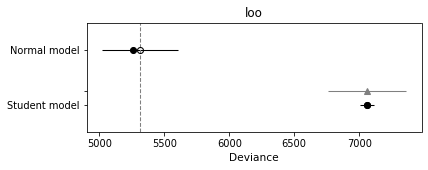

In [60]:
az.plot_compare(loo)
plt.title("loo")
plt.show()

In [61]:
waic = az.compare({"Normal model": az.from_cmdstanpy(sim_3), "Student model": az.from_cmdstanpy(sim_4)}, ic="waic", scale="deviance")
waic

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
Normal model,0,5317.698370,29.907865,0.000000,0.986242,296.088966,0.000000,True,deviance
Student model,1,7062.255641,1.925841,1744.557272,0.013758,53.114517,301.434313,False,deviance


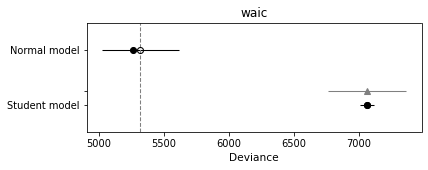

In [65]:
az.plot_compare(waic)
plt.title("waic")
plt.show()

Normal model has a better accuracy.

# Excercise 3 - compare models with different numbers of predictors

In [45]:
model_5 = CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:compiling stan file /home/lab_6/code_5.stan to exe file /home/lab_6/code_5
INFO:cmdstanpy:compiled model executable: /home/lab_6/code_5


In [50]:
data_sim_5_1 = {'N':N, 'K': 1, 'y': d_2.loc[:, 'y[1]': f'y[{N}]'].values.reshape((N,)), 'X': d_2.loc[:, 'X[1,1]':f'X[{N},1]'].values.reshape((N, 1))}
data_sim_5_2 = {'N':N, 'K': 2, 'y': d_2.loc[:, 'y[1]': f'y[{N}]'].values.reshape((N,)), 'X': d_2.loc[:, 'X[1,1]':f'X[{N},2]'].values.reshape((N, 2))}
data_sim_5_3 = {'N':N, 'K': 3, 'y': d_2.loc[:, 'y[1]': f'y[{N}]'].values.reshape((N,)), 'X': d_2.loc[:, 'X[1,1]':f'X[{N},3]'].values.reshape((N, 3))}

In [51]:
sim_5_1 = model_5.sample(data=data_sim_5_1, seed=28052020)
sim_5_2 = model_5.sample(data=data_sim_5_2, seed=28052020)
sim_5_3 = model_5.sample(data=data_sim_5_3, seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████ | 00:01 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [53]:
loo = az.compare({"K=1": az.from_cmdstanpy(sim_5_1), "K=2": az.from_cmdstanpy(sim_5_2), "K=3": az.from_cmdstanpy(sim_5_3)}, ic="loo", scale="deviance")
loo

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
K=1,0,5519.241191,1.788478,0.000000,1.000000e+00,51.535337,0.000000,False,deviance
K=2,1,7056.913124,2.995534,1537.671934,0.000000e+00,52.807612,58.645970,False,deviance
K=3,2,7061.596032,3.858108,1542.354841,2.919887e-14,52.524369,58.524526,False,deviance


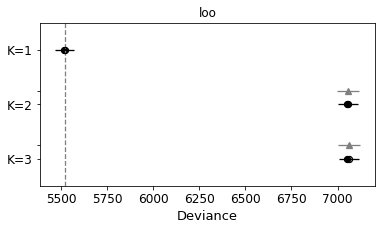

In [58]:
az.plot_compare(loo)
plt.title("loo")
plt.show()

In [55]:
waic = az.compare({"K=1": az.from_cmdstanpy(sim_5_1), "K=2": az.from_cmdstanpy(sim_5_2), "K=3": az.from_cmdstanpy(sim_5_3)}, ic="waic", scale="deviance")
waic

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
K=1,0,5519.241254,1.788510,0.000000,1.000000e+00,51.535345,0.000000,False,deviance
K=2,1,7056.912655,2.995300,1537.671401,1.455920e-13,52.807573,58.645947,False,deviance
K=3,2,7061.595841,3.858013,1542.354587,0.000000e+00,52.524360,58.524517,False,deviance


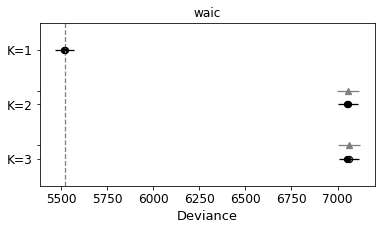

In [57]:
az.plot_compare(waic)
plt.title("waic")
plt.show()

K=1 has the best accuracy.